In [3]:
pip install h5py

    100% |████████████████████████████████| 2.8MB 3.0MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [2]:
x_train_orig, y_train, x_test_orig, y_test, classes = load_dataset()

y = [1]


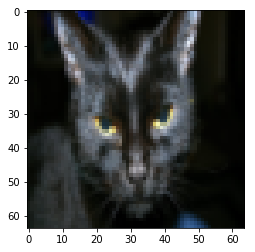

In [3]:
index = 25
plt.imshow(x_train_orig[index])
print("y = " + str(y_train[:, index]))

In [5]:
m_train = len(x_train_orig)
m_test = len(x_test_orig)
num_px = len(x_train_orig[0])

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(x_train_orig.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test_orig.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [6]:
# Flattening the image data into width*height*3, m_train dimensions
x_train = np.reshape(x_train_orig, (m_train, -1)).T
x_test = np.reshape(x_test_orig, (m_test, -1)).T

print ("train_set_x_flatten shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))
print ("sanity check after reshaping: " + str(x_train[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [7]:
# normalizing the image values (feature scaling)
x_train = x_train / 255
x_test = x_test / 255

In [8]:
# The sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [10]:
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [11]:
# w --> n, 1
# b --> scalar
# X --> n, m
# Y --> 1, m

def propagate(w, b, X, Y):
    
    # no. of training examples
    m = X.shape[1]
    
    # FORWARD PROPAGATION: From X to cost
    # computing the activation function
    temp = np.dot(w.T, X) + b
    A = sigmoid(temp)
    # computing the cost function
    cost = -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) 
    
    # BACKWARD PROPAGATION: To find Grad
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)
    
    # check the dimensions of the computed quantities are correct
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    #convert cost to scalar
    cost = np.squeeze(cost)
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

In [12]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [13]:
def optimize(w, b, X, Y, num_iterations, learning_rate, show_cost=False):
    
    costs = []
    
    for i in range(num_iterations):
        
        # Get cost and grads after ith iteration
        grads, cost = propagate(w, b, X, Y)
        
        if i % 100 == 0:
            costs.append(cost)
            if show_cost:
                print("Cost at " + str(i) + "th iteration: " + str(cost))
        
        dw = grads["dw"]
        db = grads["db"]
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
    params = {
        "w": w,
        "b": b,
    }
    
    grads = {
        "dw": dw,
        "db": db,
    }
    
    return params, grads, costs

In [14]:
def predict(w, b, X):
    
    # getting no. of data
    m = X.shape[1]
    w = w.reshape(X.shape[0], 1)
    
    Y_pred = np.zeros((1, m))
    
    # Calculating the probabilities of the samples
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # converting probability to actual predictions
        Y_pred[0, i] = 1 if A[0, i] > 0.5 else 0
        
    assert (Y_pred.shape == (1, m))
    
    return Y_pred

In [24]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    # Step 1 : Initialize parameters
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Step 2: Optimize parameters
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations=num_iterations, learning_rate=learning_rate, show_cost=print_cost)
    w = params["w"]
    b = params["b"]
    
    # Predict train and test data
    Y_pred_train = predict(w, b, X_train)
    Y_pred_test = predict(w, b, X_test)
    
    # Printing accuracy
    print("Train accuracy: {0}".format(np.mean(Y_pred_train == Y_train) * 100))
    print("Test accuracy: {0}".format(np.mean(Y_pred_test == Y_test) * 100))
    
    data = {
        "costs": costs,
        "train_prediction": Y_pred_train,
        "test_prediction": Y_pred_test,
        "learning_rate": learning_rate,
        "params": params,
    }
    
    return data

In [25]:
data = model(x_train, y_train, x_test, y_test, learning_rate=0.005, print_cost=True)

Cost at 0th iteration: 0.6931471805599453
Cost at 100th iteration: 0.5845083636993086
Cost at 200th iteration: 0.4669490409465546
Cost at 300th iteration: 0.37600686694802077
Cost at 400th iteration: 0.3314632893282513
Cost at 500th iteration: 0.30327306747438293
Cost at 600th iteration: 0.27987958658260487
Cost at 700th iteration: 0.2600421369258757
Cost at 800th iteration: 0.2429406846779662
Cost at 900th iteration: 0.2280042225672606
Cost at 1000th iteration: 0.2148195137844964
Cost at 1100th iteration: 0.20307819060644985
Cost at 1200th iteration: 0.19254427716706862
Cost at 1300th iteration: 0.18303333796883509
Cost at 1400th iteration: 0.17439859438448874
Cost at 1500th iteration: 0.16652139705400335
Cost at 1600th iteration: 0.15930451829756614
Cost at 1700th iteration: 0.15266732471296504
Cost at 1800th iteration: 0.1465422350398234
Cost at 1900th iteration: 0.1408720757031016
Train accuracy: 99.04306220095694
Test accuracy: 70.0


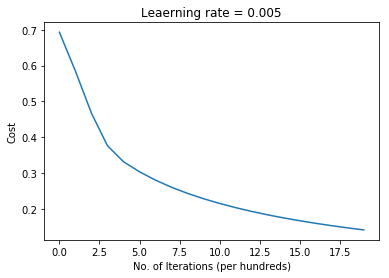

In [26]:
costs = data["costs"]
plt.xlabel("No. of Iterations (per hundreds)")
plt.ylabel("Cost")
plt.title("Leaerning rate = 0.005")
plt.plot(costs)
plt.show()

learning rate is: 0.01
Train accuracy: 99.52153110047847
Test accuracy: 68.0

-------------------------------------------------------

learning rate is: 0.001
Train accuracy: 88.99521531100478
Test accuracy: 64.0

-------------------------------------------------------

learning rate is: 0.0001
Train accuracy: 68.42105263157895
Test accuracy: 36.0

-------------------------------------------------------



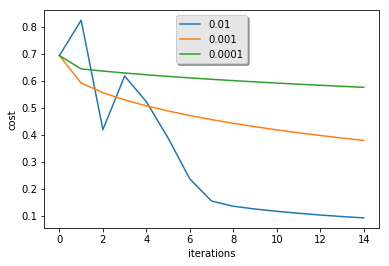

In [27]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(x_train, y_train, x_test, y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  if __name__ == '__main__':
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # Remove the CWD from sys.path while we load stuff.


y = 1.0, your algorithm predicts a "cat" picture.


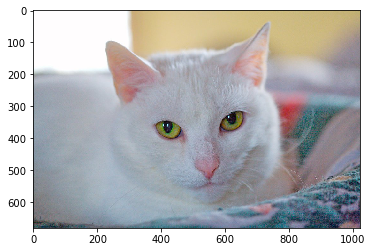

In [33]:
# Testing with random images

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image2.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(data["params"]["w"], data["params"]["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")